In [1]:
from utide._ut_constants import ut_constants

ut_constants["const"]["name"]

/home/jan/src/tidepredictor/.venv/lib/python3.11/site-packages/utide/harmonics.py:16: RuntimeWarning: invalid value encountered in cast
  nshallow = np.ma.masked_invalid(const.nshallow).astype(int)
/home/jan/src/tidepredictor/.venv/lib/python3.11/site-packages/utide/harmonics.py:17: RuntimeWarning: invalid value encountered in cast
  ishallow = np.ma.masked_invalid(const.ishallow).astype(int) - 1


array(['Z0', 'SA', 'SSA', 'MSM', 'MM', 'MSF', 'MF', 'ALP1', '2Q1', 'SIG1',
       'Q1', 'RHO1', 'O1', 'TAU1', 'BET1', 'NO1', 'CHI1', 'PI1', 'P1',
       'S1', 'K1', 'PSI1', 'PHI1', 'THE1', 'J1', '2PO1', 'SO1', 'OO1',
       'UPS1', 'ST36', '2NS2', 'ST37', 'ST1', 'OQ2', 'EPS2', 'ST2', 'ST3',
       'O2', '2N2', 'MU2', 'SNK2', 'N2', 'NU2', 'ST4', 'OP2', 'GAM2',
       'H1', 'M2', 'H2', 'MKS2', 'ST5', 'ST6', 'LDA2', 'L2', '2SK2', 'T2',
       'S2', 'R2', 'K2', 'MSN2', 'ETA2', 'ST7', '2SM2', 'ST38', 'SKM2',
       '2SN2', 'NO3', 'MO3', 'M3', 'NK3', 'SO3', 'MK3', 'SP3', 'SK3',
       'ST8', 'N4', '3MS4', 'ST39', 'MN4', 'ST9', 'ST40', 'M4', 'ST10',
       'SN4', 'KN4', 'MS4', 'MK4', 'SL4', 'S4', 'SK4', 'MNO5', '2MO5',
       '3MP5', 'MNK5', '2MP5', '2MK5', 'MSK5', '3KM5', '2SK5', 'ST11',
       '2NM6', 'ST12', '2MN6', 'ST13', 'ST41', 'M6', 'MSN6', 'MKN6',
       'ST42', '2MS6', '2MK6', 'NSK6', '2SM6', 'MSK6', 'S6', 'ST14',
       'ST15', 'M7', 'ST16', '3MK7', 'ST17', 'ST18', '3MN8', 'ST19', 

In [72]:
import polars as pl
from utide._ut_constants import ut_constants

used_consts = "Q1 MF P1 K1 MM O1 M2 S2 M4 MN4 MS4 N2 K2".split()

consts = (
    pl.DataFrame(ut_constants["const"])
    .select("name", pl.col("freq").alias("freq_cph"))
    .filter(pl.col("name").is_in(used_consts))
    .with_columns((1 / pl.col("freq_cph")).alias("period_h"))
    .sort("period_h", descending=True)
)

with pl.Config(
    tbl_formatting="MARKDOWN",
    tbl_hide_column_data_types=True,
    tbl_hide_dataframe_shape=True,
):
    print(consts.head(10))

| name | freq_cph | period_h   |
|------|----------|------------|
| MM   | 0.001512 | 661.309268 |
| MF   | 0.00305  | 327.858984 |
| Q1   | 0.037219 | 26.868357  |
| O1   | 0.038731 | 25.819342  |
| P1   | 0.041553 | 24.06589   |
| K1   | 0.041781 | 23.93447   |
| N2   | 0.078999 | 12.658348  |
| M2   | 0.080511 | 12.420601  |
| S2   | 0.083333 | 12.0       |
| K2   | 0.083561 | 11.967235  |


In [67]:
from great_tables import GT, html

(
    GT(consts)
    .tab_header("Tidal Constituents")
    .fmt_number("period_h", decimals=1)
    .fmt_scientific("freq_cph")
    .cols_label(
        freq_cph=html("Frequency<br>h<sup>-1</sup>"), period_h=html("Period<br>(h)")
    )
).as_raw_html()

'<div id="kiueaqtgjh" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">\n<style>\n#kiueaqtgjh table {\n          font-family: -apple-system, BlinkMacSystemFont, \'Segoe UI\', Roboto, Oxygen, Ubuntu, Cantarell, \'Helvetica Neue\', \'Fira Sans\', \'Droid Sans\', Arial, sans-serif;\n          -webkit-font-smoothing: antialiased;\n          -moz-osx-font-smoothing: grayscale;\n        }\n\n#kiueaqtgjh thead, tbody, tfoot, tr, td, th { border-style: none; }\n tr { background-color: transparent; }\n#kiueaqtgjh p { margin: 0; padding: 0; }\n #kiueaqtgjh .gt_table { display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; borde

In [17]:
import xarray as xr

ds = xr.open_dataset(
    "../data/constituents_2min/GlobalTideElevation_DTU-TPXO8_2min_v1_UpperCase.nc"
)
global_consts = set([v.split("_")[0] for v in ds.data_vars])
len(global_consts)

13

In [3]:
utide_consts = set(ut_constants["const"]["name"])

In [4]:
global_consts.issubset(utide_consts)

True

In [18]:
list(global_consts)

['Q1',
 'MF',
 'P1',
 'K1',
 'MM',
 'O1',
 'M2',
 'S2',
 'M4',
 'MN4',
 'MS4',
 'N2',
 'K2']

In [5]:
global_consts - utide_consts

set()

In [28]:
import numpy as np

coef = {
    # some names of consituents, used for subselection
    "name": [
        "K1",
        "K2",
        "M2",
        "M4",
        "MF",
        "MM",
        "MN4",
        "MS4",
        "N2",
    ],  # 'O1', 'P1', 'Q1', 'S2'],
    "mean": 0.0,
    # amplitudes
    "A": np.array(
        [
            1.00227454,
            0.02250278,
            0.01775812,
            0.01605451,
            0.01220086,
            0.00751468,
            0.00708371,
            0.00577484,
            0.00313313,
        ]
    ),
    # phases
    "g": np.array(
        [
            139.03197411,
            144.78007052,
            117.14151752,
            104.1430418,
            216.82454621,
            4.40876086,
            240.44658427,
            50.66603851,
            144.04531879,
        ]
    ),
    "aux": {
        "opt": {
            "twodim": False,
            "nodiagn": True,
            "nodsatlint": 0,
            "nodsatnone": True,
            "gwchlint": False,
            "gwchnone": False,
            "prefilt": np.array([]),
            "notrend": True,
        },
        # reference time in days
        "reftime": 737429.1458333333,
        # frequencies in cycles per hour
        "frq": np.array(
            [
                0.0805114,  # M2
                0.04178075,  # ?
                0.3220456,
                0.20280355,
                0.1207671,
                0.28331495,
                0.1610228,
                0.2415342,
                0.20844741,
            ]
        ),
        # latitude
        "lat": -42.5,
        # list indices of constituents in ut_constants.mat (nc x 1)
        "lind": np.array([47, 20, 124, 95, 68, 119, 81, 105, 98]),
    },
}

In [29]:
from utide import reconstruct
import pandas as pd

t = pd.date_range("2000", periods=10, freq="h")

tide = reconstruct(t, coef, constit=global_consts)

TypeError: list indices must be integers or slices, not list

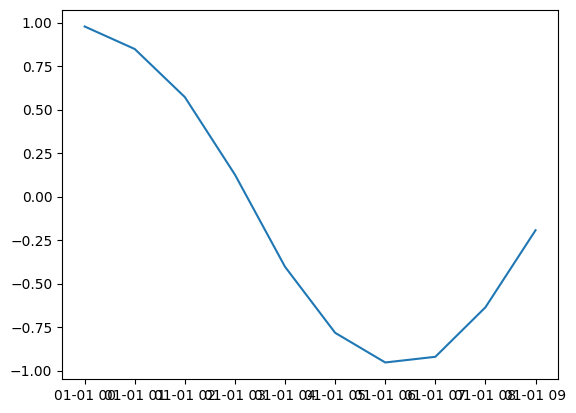

In [11]:
import matplotlib.pyplot as plt

plt.plot(tide["t_in"], tide["h"])